# SIRD model

This notebook contains code for runnning an SIRD model for disease propagation.

We will use the Euler method to numerically sovle coupled first order ODE's for the SIRD ODE model.

S = Susceptible, I = Infected, R = Recovered, D = Dead, N = Total = S+I+R+D

$\frac{dS}{dt}=-\frac{q\beta}{N}SI$

$\frac{dI}{dt}=\frac{q\beta}{N}SI-(1-\alpha)\gamma I-\alpha\rho I$

$\frac{dR}{dt}=(1-\alpha)\gamma I$

$\frac{dD}{dt}=\alpha\rho I$

Here, $\beta$ represents the average number of people that come within infection range of an infected individual per day, which is given by $\frac{1}{\text{number of individuals}}$. $\gamma$ is the remove probability per day, which is given by $\frac{1}{\text{recovery time}}$. $\alpha$ is the percentage of infected people who die. $\rho$ is the rate at which people die, given as $\frac{1}{\text{time infected before death}}$. q is the mitigation factor due to quarantining (between 0 and 1), where 0 is perfect quarantine and 1 is no quarantine.

Below we import packages. (MUST RUN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import sys

Now we initialize parameters.

Time step in days: (MUST RUN)

In [2]:
dt = 0.01

Total time in days: (MUST RUN)

In [3]:
tottime = 365

Other parameters: (MUST RUN)

In [4]:
beta = 0.25
gamma = 0.05 #20 days of infection
alpha = 0.05 #5% of infected die
rho = 0.05 #20 days infected before death
q = 1 #assumes no quarantine
N = 5E4

Initial population conditions: (MUST RUN)

In [5]:
pr = 0.0 #initial percent recovered (immune)
pi = 0.0001 #initial percent infected
ps = 1-pr-pi #initial percent susceptible

Initializing population arrays: (MUST RUN)

In [6]:
niter = int(math.ceil(tottime/dt))
t = np.arange(0, tottime, dt)
S = np.zeros(niter)
I = np.zeros(niter)
R = np.zeros(niter)
D = np.zeros(niter)

Applying initial population conditions: (MUST RUN)

In [7]:
S[0] = ps*N
I[0] = pi*N
R[0] = pr*N
D[0] = 0

Implementing Euler's method:

In [8]:
for j in range(niter-1):
    dSdt = -q*beta/N*S[j]*I[j]
    dIdt = q*beta/N*S[j]*I[j] - (1-alpha)*gamma*I[j] - alpha*rho*I[j]
    dRdt = (1-alpha)*gamma*I[j]
    dDdt = alpha*rho*I[j]
    S[j+1] = S[j] + dt*dSdt
    I[j+1] = I[j] + dt*dIdt
    R[j+1] = R[j] + dt*dRdt
    D[j+1] = D[j] + dt*dDdt
N = S + I + R + D

Plotting:

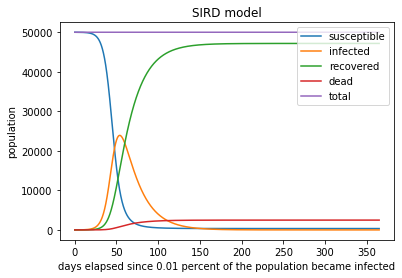

In [9]:
plt.plot(t, S)
plt.plot(t, I)
plt.plot(t, R)
plt.plot(t, D)
plt.plot(t, N)
plt.legend(['susceptible', 'infected', 'recovered', 'dead', 'total'], loc = 'upper right')
plt.title('SIRD model')
plt.xlabel('days elapsed since 0.01 percent of the population became infected')
plt.ylabel('population')
plt.show()

# SIRD model with quarantine "switch"

### This version starts with quarantine "on" and turns it "off" after a prescribed number of days.

In [10]:
days_under_quarantine = 100

N = 5E4

S = np.zeros(niter)
I = np.zeros(niter)
R = np.zeros(niter)
D = np.zeros(niter)
     
S[0] = ps*N
I[0] = pi*N
R[0] = pr*N
D[0] = 0

for j in range(niter-1):
    if j <= days_under_quarantine / dt:
        q = 0.5
    else:
        q = 1
    dSdt = -q*beta/N*S[j]*I[j]
    dIdt = q*beta/N*S[j]*I[j] - (1-alpha)*gamma*I[j] - alpha*rho*I[j]
    dRdt = (1-alpha)*gamma*I[j]
    dDdt = alpha*rho*I[j]
    S[j+1] = S[j] + dt*dSdt
    I[j+1] = I[j] + dt*dIdt
    R[j+1] = R[j] + dt*dRdt
    D[j+1] = D[j] + dt*dDdt
N = S + I + R + D

Plotting:

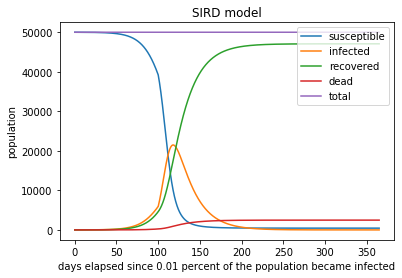

In [11]:
plt.plot(t, S)
plt.plot(t, I)
plt.plot(t, R)
plt.plot(t, D)
plt.plot(t, N)
plt.legend(['susceptible', 'infected', 'recovered', 'dead', 'total'], loc = 'upper right')
plt.title('SIRD model')
plt.xlabel('days elapsed since 0.01 percent of the population became infected')
plt.ylabel('population')
plt.show()

### This version starts with quarantine "on", then turns it "off" after a presrcibed number of days, and then turns it back "on" again after some more time.

In [12]:
days_under_first_quarantine = 100
day_second_quarantine_starts = 120

N = 5E4

S = np.zeros(niter)
I = np.zeros(niter)
R = np.zeros(niter)
D = np.zeros(niter)
     
S[0] = ps*N
I[0] = pi*N
R[0] = pr*N
D[0] = 0

for j in range(niter-1):
    if j <= days_under_first_quarantine / dt:
        q = 0.5
    elif j<= day_second_quarantine_starts /dt and j > days_under_first_quarantine / dt:
        q = 1
    else:
        q = 0.5
    dSdt = -q*beta/N*S[j]*I[j]
    dIdt = q*beta/N*S[j]*I[j] - (1-alpha)*gamma*I[j] - alpha*rho*I[j]
    dRdt = (1-alpha)*gamma*I[j]
    dDdt = alpha*rho*I[j]
    S[j+1] = S[j] + dt*dSdt
    I[j+1] = I[j] + dt*dIdt
    R[j+1] = R[j] + dt*dRdt
    D[j+1] = D[j] + dt*dDdt
N = S + I + R + D

Plotting:

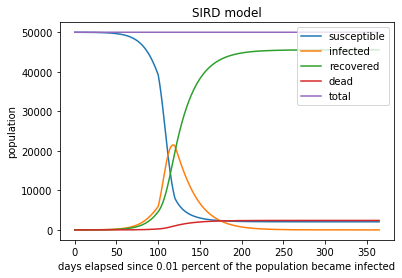

In [13]:
plt.plot(t, S)
plt.plot(t, I)
plt.plot(t, R)
plt.plot(t, D)
plt.plot(t, N)
plt.legend(['susceptible', 'infected', 'recovered', 'dead', 'total'], loc = 'upper right')
plt.title('SIRD model')
plt.xlabel('days elapsed since 0.01 percent of the population became infected')
plt.ylabel('population')
plt.show()

# SIRD model with multiple subpopulations

We will use the Euler method to numerically sovle coupled first order ODE's for the SIR ODE model.

S = Susceptible, I = Infected, R = Recovered, D = Dead

S1 = Susceptible Extreme Isolators, S2 = Susceptible Super Spreaders, S3 = Susceptible Average People

I1 = Infected Extreme Isolators, I2 = Infected Super Spreaders, I3 = Infected Average People

R1 = Recovered Extreme Isolators, R2 = Recovered Super Spreaders, R3 = Recovered Average People

D1 = Dead Extreme Isolators, D2 = Dead Super Spreaders, D3 = Dead Average People

$\frac{dS}{dt}=-\frac{q\beta}{N}SI$

$\frac{dI}{dt}=\frac{q\beta}{N}SI-(1-\alpha)\gamma I-\alpha\rho I$

$\frac{dR}{dt}=(1-\alpha)\gamma I$

$\frac{dD}{dt}=\alpha\rho I$

$\frac{dS_1}{dt}=-\frac{q_1\beta}{N}S_1I$

$\frac{dS_2}{dt}=-\frac{q_2\beta}{N}S_2I$

$\frac{dS_3}{dt}=-\frac{q_3\beta}{N}S_3I$

$\frac{dI_1}{dt}=\frac{q_1\beta}{N}S_1I-(1-\alpha)\gamma I_1-\alpha\rho I_1$

$\frac{dI_2}{dt}=\frac{q_2\beta}{N}S_2I-(1-\alpha)\gamma I_2-\alpha\rho I_2$

$\frac{dI_3}{dt}=\frac{q_3\beta}{N}S_3I-(1-\alpha)\gamma I_3-\alpha\rho I_3$

$\frac{dR_1}{dt}=(1-\alpha)\gamma I_1$

$\frac{dR_2}{dt}=(1-\alpha)\gamma I_2$

$\frac{dR_3}{dt}=(1-\alpha)\gamma I_3$

$\frac{dD_1}{dt}=\alpha\rho I_1$

$\frac{dD_2}{dt}=\alpha\rho I_2$

$\frac{dD_3}{dt}=\alpha\rho I_3$

Here, $\beta$ represents the average number of people that come within infection range of an infected individual per day, which is given by $\frac{1}{\text{number of individuals}}$. $\gamma$ is the remove probability per day, which is given by $\frac{1}{\text{recovery time}}$. $\alpha$ is the percentage of infected people who die. $\rho$ is the rate at which people die, given as $\frac{1}{\text{time infected before death}}$. q is the mitigation factor due to quarantining (between 0 and 1), where 0 is perfect quarantine and 1 is no quarantine.

In [14]:
N = 5E4

psd = 0.2 # percent extreme isolators
pss = 0.2 # percent super spreaders

q1 = 0 # mitigation factor for extreme isolators
q2 = 1 # mitigation factor for super spreaders
q3 = 0.5 # mitigation factor for average people

S = np.zeros(niter) # total susceptible population
S1 = np.zeros(niter) # susceptible extreme isolators
S2 = np.zeros(niter) # susceptible super spreaders
S3 = np.zeros(niter) # susceptible average people
I = np.zeros(niter) # total infected population
I1 = np.zeros(niter) # infected extreme isolators
I2 = np.zeros(niter) # infected super spreaders
I3 = np.zeros(niter) # infected average people
R = np.zeros(niter) # total recovered population
R1 = np.zeros(niter) # recovered extreme isolators
R2 = np.zeros(niter) # recovered super spreaders
R3 = np.zeros(niter) # recovered average people
D = np.zeros(niter) # total dead population
D1 = np.zeros(niter) # dead extreme isolators
D2 = np.zeros(niter) # dead super spreaders
D3 = np.zeros(niter) # dead average people
     
S[0] = ps*N
S1[0] = psd*S[0]
S2[0] = pss*S[0]
S3[0] = S[0]-S1[0]-S2[0]
I[0] = pi*N
I1[0] = psd*I[0]
I2[0] = pss*I[0]
I3[0] = I[0]-I1[0]-I2[0]
R[0] = pr*N
R1[0] = psd*R[0]
R2[0] = pss*R[0]
R3[0] = R[0]-R1[0]-R2[0]
D[0] = 0
D1[0] = 0
D2[0] = 0
D3[0] = 0

for j in range(niter-1):
    dS1dt = -q1*beta/N*S1[j]*I[j]
    dS2dt = -q2*beta/N*S2[j]*I[j]
    dS3dt = -q3*beta/N*S3[j]*I[j]
    dIdt = q1*beta/N*S1[j]*I[j] + q2*beta/N*S2[j]*I[j] + q3*beta/N*S3[j]*I[j] - (1-alpha)*gamma*I[j] - alpha*rho*I[j]
    dI1dt = q1*beta/N*S1[j]*I[j] - (1-alpha)*gamma*I1[j] - alpha*rho*I1[j]
    dI2dt = q2*beta/N*S2[j]*I[j] - (1-alpha)*gamma*I2[j] - alpha*rho*I2[j]
    dI3dt = q3*beta/N*S3[j]*I[j] - (1-alpha)*gamma*I3[j] - alpha*rho*I3[j]
    dRdt = (1-alpha)*gamma*I[j]
    dR1dt = (1-alpha)*gamma*I1[j]
    dR2dt = (1-alpha)*gamma*I2[j]
    dR3dt = (1-alpha)*gamma*I3[j]
    dDdt = alpha*rho*I[j]
    dD1dt = alpha*rho*I1[j]
    dD2dt = alpha*rho*I2[j]
    dD3dt = alpha*rho*I3[j]
    S1[j+1] = S1[j] + dt*dS1dt
    S2[j+1] = S2[j] + dt*dS2dt
    S3[j+1] = S3[j] + dt*dS3dt
    I[j+1] = I[j] + dt*dIdt
    I1[j+1] = I1[j] +dt*dI1dt
    I2[j+1] = I2[j] +dt*dI2dt
    I3[j+1] = I3[j] +dt*dI3dt
    R[j+1] = R[j] + dt*dRdt
    R1[j+1] = R1[j] + dt*dR1dt
    R2[j+1] = R2[j] + dt*dR2dt
    R3[j+1] = R3[j] + dt*dR3dt
    D[j+1] = D[j] + dt*dDdt
    D1[j+1] = D1[j] + dt*dD1dt
    D2[j+1] = D2[j] + dt*dD2dt
    D3[j+1] = D3[j] + dt*dD3dt
S = S1 + S2 + S3
N = S + I + R + D
T1 = S1 + I1 + R1 + D1
T2 = S2 + I2 + R2 + D2
T3 = S3 + I3 + R3 + D3

Plotting:

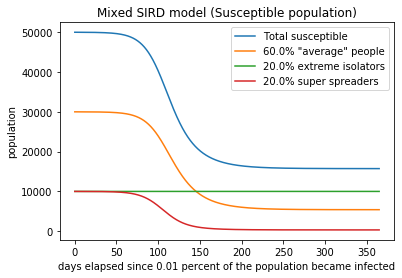

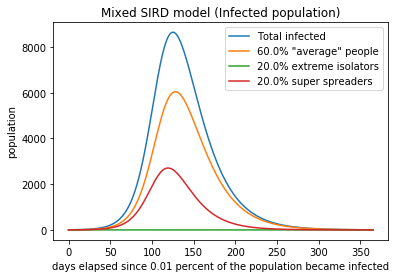

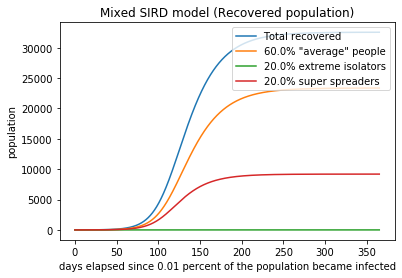

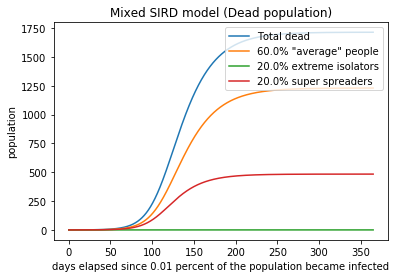

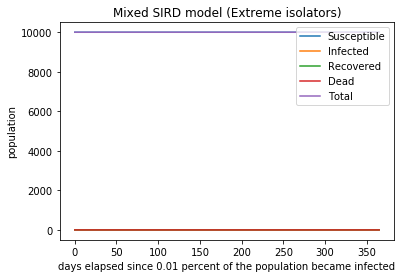

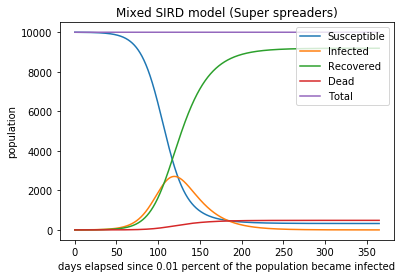

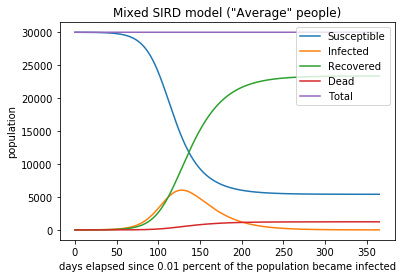

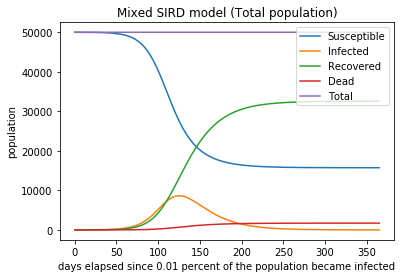

In [15]:
for n in range(8):
    if n == 0:
        plt.plot(t, S)   
        plt.plot(t, S3)
        plt.plot(t, S1)
        plt.plot(t, S2)
        plt.legend(['Total susceptible', str(round(((1-pss-psd)*100),3)) + '% "average" people',
                    str(round((psd*100),3)) + '% extreme isolators',
                    str(round((pss*100),3)) + '% super spreaders'], loc='upper right')
        plt.title('Mixed SIRD model (Susceptible population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()
    elif n == 1:
        plt.plot(t, I)
        plt.plot(t, I3)
        plt.plot(t, I1)
        plt.plot(t, I2)
        plt.legend(['Total infected', str(round(((1-pss-psd)*100),3)) + '% "average" people',
                    str(round((psd*100),3)) + '% extreme isolators',
                    str(round((pss*100),3)) + '% super spreaders'], loc='upper right')
        plt.title('Mixed SIRD model (Infected population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()    
    elif n == 2:
        plt.plot(t, R)
        plt.plot(t, R3)
        plt.plot(t, R1)
        plt.plot(t, R2)
        plt.legend(['Total recovered', str(round(((1-pss-psd)*100),3)) + '% "average" people',
                    str(round((psd*100),3)) + '% extreme isolators',
                    str(round((pss*100),3)) + '% super spreaders'], loc='upper right')
        plt.title('Mixed SIRD model (Recovered population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()
    elif n == 3:
        plt.plot(t, D)
        plt.plot(t, D3)
        plt.plot(t, D1)
        plt.plot(t, D2)
        plt.legend(['Total dead', str(round(((1-pss-psd)*100),3)) + '% "average" people',
                    str(round((psd*100),3)) + '% extreme isolators',
                    str(round((pss*100),3)) + '% super spreaders'], loc='upper right')
        plt.title('Mixed SIRD model (Dead population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()
    elif n == 4:
        plt.plot(t, S1)
        plt.plot(t, I1)
        plt.plot(t, R1)
        plt.plot(t, D1)
        plt.plot(t, T1)
        plt.legend(['Susceptible', 'Infected', 'Recovered', 'Dead', 'Total'], loc='upper right')
        plt.title('Mixed SIRD model (Extreme isolators)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()    
    elif n == 5:
        plt.plot(t, S2)
        plt.plot(t, I2)
        plt.plot(t, R2)
        plt.plot(t, D2)
        plt.plot(t, T2)
        plt.legend(['Susceptible', 'Infected', 'Recovered', 'Dead', 'Total'], loc='upper right')
        plt.title('Mixed SIRD model (Super spreaders)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()
    elif n == 6:
        plt.plot(t, S3)
        plt.plot(t, I3)
        plt.plot(t, R3)
        plt.plot(t, D3)
        plt.plot(t, T3)
        plt.legend(['Susceptible', 'Infected', 'Recovered', 'Dead', 'Total'], loc='upper right')
        plt.title('Mixed SIRD model ("Average" people)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()    
    else:
        plt.plot(t, S)
        plt.plot(t, I)
        plt.plot(t, R)
        plt.plot(t, D)
        plt.plot(t, N)
        plt.legend(['Susceptible', 'Infected', 'Recovered', 'Dead', 'Total'], loc='upper right')
        plt.title('Mixed SIRD model (Total population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()

# SIRD model with multiple subpopulations and quarantine switch

### This version starts with quarantine "on" and turns it "off" after a prescribed number of days.

In [16]:
days_under_quarantine = 100

N = 5E4

psd = 0.2 # percent extreme isolators
pss = 0.2 # percent super spreaders

S = np.zeros(niter) # total susceptible population
S1 = np.zeros(niter) # susceptible extreme isolators
S2 = np.zeros(niter) # susceptible super spreaders
S3 = np.zeros(niter) # susceptible average people
I = np.zeros(niter) # total infected population
I1 = np.zeros(niter) # infected extreme isolators
I2 = np.zeros(niter) # infected super spreaders
I3 = np.zeros(niter) # infected average people
R = np.zeros(niter) # total recovered population
R1 = np.zeros(niter) # recovered extreme isolators
R2 = np.zeros(niter) # recovered super spreaders
R3 = np.zeros(niter) # recovered average people
D = np.zeros(niter) # total dead population
D1 = np.zeros(niter) # dead extreme isolators
D2 = np.zeros(niter) # dead super spreaders
D3 = np.zeros(niter) # dead average people
     
S[0] = ps*N
S1[0] = psd*S[0]
S2[0] = pss*S[0]
S3[0] = S[0]-S1[0]-S2[0]
I[0] = pi*N
I1[0] = psd*I[0]
I2[0] = pss*I[0]
I3[0] = I[0]-I1[0]-I2[0]
R[0] = pr*N
R1[0] = psd*R[0]
R2[0] = pss*R[0]
R3[0] = R[0]-R1[0]-R2[0]
D[0] = 0
D1[0] = 0
D2[0] = 0
D3[0] = 0

for j in range(niter-1):
    if j <= days_under_quarantine / dt:
        q1 = 0 # initial mitigation factor for extreme isolators
        q2 = 1 # initial mitigation factor for super spreaders
        q3 = 0.5 # initial mitigation factor for average people
    else:
        q1 = 1 # final mitigation factor for extreme isolators
        q2 = 1 # final mitigation factor for super spreaders
        q3 = 1 # final mitigation factor for average people
    dS1dt = -q1*beta/N*S1[j]*I[j]
    dS2dt = -q2*beta/N*S2[j]*I[j]
    dS3dt = -q3*beta/N*S3[j]*I[j]
    dIdt = q1*beta/N*S1[j]*I[j] + q2*beta/N*S2[j]*I[j] + q3*beta/N*S3[j]*I[j] - (1-alpha)*gamma*I[j] - alpha*rho*I[j]
    dI1dt = q1*beta/N*S1[j]*I[j] - (1-alpha)*gamma*I1[j] - alpha*rho*I1[j]
    dI2dt = q2*beta/N*S2[j]*I[j] - (1-alpha)*gamma*I2[j] - alpha*rho*I2[j]
    dI3dt = q3*beta/N*S3[j]*I[j] - (1-alpha)*gamma*I3[j] - alpha*rho*I3[j]
    dRdt = (1-alpha)*gamma*I[j]
    dR1dt = (1-alpha)*gamma*I1[j]
    dR2dt = (1-alpha)*gamma*I2[j]
    dR3dt = (1-alpha)*gamma*I3[j]
    dDdt = alpha*rho*I[j]
    dD1dt = alpha*rho*I1[j]
    dD2dt = alpha*rho*I2[j]
    dD3dt = alpha*rho*I3[j]
    S1[j+1] = S1[j] + dt*dS1dt
    S2[j+1] = S2[j] + dt*dS2dt
    S3[j+1] = S3[j] + dt*dS3dt
    I[j+1] = I[j] + dt*dIdt
    I1[j+1] = I1[j] +dt*dI1dt
    I2[j+1] = I2[j] +dt*dI2dt
    I3[j+1] = I3[j] +dt*dI3dt
    R[j+1] = R[j] + dt*dRdt
    R1[j+1] = R1[j] + dt*dR1dt
    R2[j+1] = R2[j] + dt*dR2dt
    R3[j+1] = R3[j] + dt*dR3dt
    D[j+1] = D[j] + dt*dDdt
    D1[j+1] = D1[j] + dt*dD1dt
    D2[j+1] = D2[j] + dt*dD2dt
    D3[j+1] = D3[j] + dt*dD3dt
S = S1 + S2 + S3
N = S + I + R + D
T1 = S1 + I1 + R1 + D1
T2 = S2 + I2 + R2 + D2
T3 = S3 + I3 + R3 + D3

Plotting:

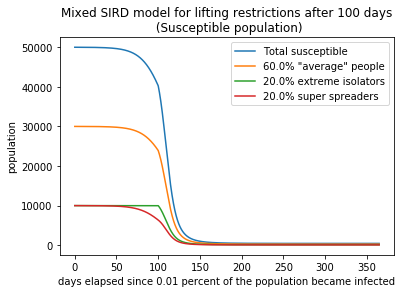

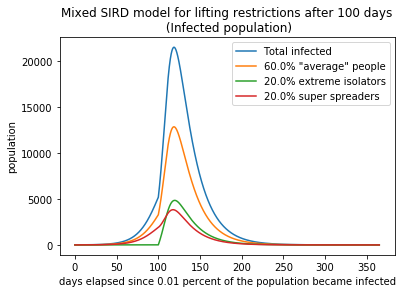

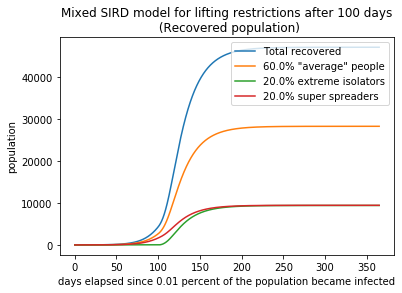

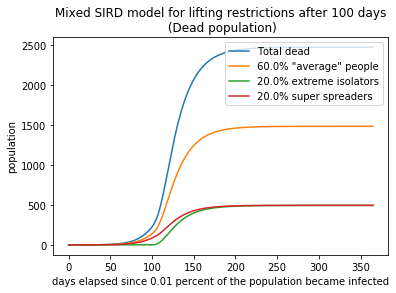

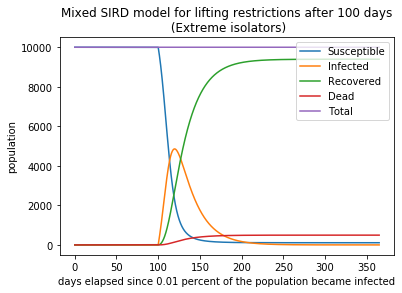

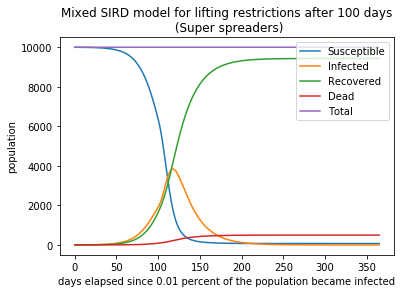

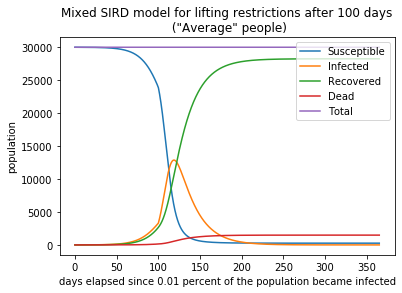

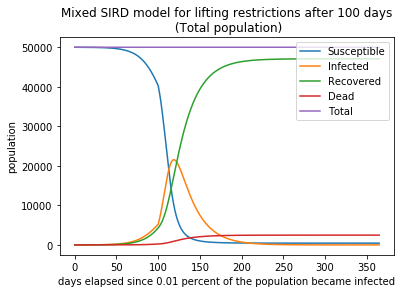

In [17]:
for n in range(8):
    if n == 0:
        plt.plot(t, S)   
        plt.plot(t, S3)
        plt.plot(t, S1)
        plt.plot(t, S2)
        plt.legend(['Total susceptible', str(round(((1-pss-psd)*100),3)) + '% "average" people',
                    str(round((psd*100),3)) + '% extreme isolators',
                    str(round((pss*100),3)) + '% super spreaders'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(days_under_quarantine)+ ' days'
                  + '\n (Susceptible population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()
    elif n == 1:
        plt.plot(t, I)
        plt.plot(t, I3)
        plt.plot(t, I1)
        plt.plot(t, I2)
        plt.legend(['Total infected', str(round(((1-pss-psd)*100),3)) + '% "average" people',
                    str(round((psd*100),3)) + '% extreme isolators',
                    str(round((pss*100),3)) + '% super spreaders'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(days_under_quarantine)+ ' days'
                  + '\n (Infected population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()    
    elif n == 2:
        plt.plot(t, R)
        plt.plot(t, R3)
        plt.plot(t, R1)
        plt.plot(t, R2)
        plt.legend(['Total recovered', str(round(((1-pss-psd)*100),3)) + '% "average" people',
                    str(round((psd*100),3)) + '% extreme isolators',
                    str(round((pss*100),3)) + '% super spreaders'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(days_under_quarantine)+ ' days'
                  + '\n (Recovered population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()
    elif n == 3:
        plt.plot(t, D)
        plt.plot(t, D3)
        plt.plot(t, D1)
        plt.plot(t, D2)
        plt.legend(['Total dead', str(round(((1-pss-psd)*100),3)) + '% "average" people',
                    str(round((psd*100),3)) + '% extreme isolators',
                    str(round((pss*100),3)) + '% super spreaders'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(days_under_quarantine)+ ' days'
                  + '\n (Dead population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()
    elif n == 4:
        plt.plot(t, S1)
        plt.plot(t, I1)
        plt.plot(t, R1)
        plt.plot(t, D1)
        plt.plot(t, T1)
        plt.legend(['Susceptible', 'Infected', 'Recovered', 'Dead', 'Total'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(days_under_quarantine)+ ' days'
                  + '\n (Extreme isolators)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()    
    elif n == 5:
        plt.plot(t, S2)
        plt.plot(t, I2)
        plt.plot(t, R2)
        plt.plot(t, D2)
        plt.plot(t, T2)
        plt.legend(['Susceptible', 'Infected', 'Recovered', 'Dead', 'Total'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(days_under_quarantine)+ ' days'
                  + '\n (Super spreaders)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()
    elif n == 6:
        plt.plot(t, S3)
        plt.plot(t, I3)
        plt.plot(t, R3)
        plt.plot(t, D3)
        plt.plot(t, T3)
        plt.legend(['Susceptible', 'Infected', 'Recovered', 'Dead', 'Total'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(days_under_quarantine)+ ' days'
                  + '\n ("Average" people)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()    
    else:
        plt.plot(t, S)
        plt.plot(t, I)
        plt.plot(t, R)
        plt.plot(t, D)
        plt.plot(t, N)
        plt.legend(['Susceptible', 'Infected', 'Recovered', 'Dead', 'Total'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(days_under_quarantine)+ ' days'
                  + '\n (Total population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()    


### This version starts with quarantine "on", then turns it "off" after a presrcibed number of days, and then turns it back "on" again after some more time.

In [18]:
days_under_first_quarantine = 100
day_second_quarantine_starts = 120

N = 5E4

psd = 0.2 # percent extreme isolators
pss = 0.2 # percent super spreaders

S = np.zeros(niter) # total susceptible population
S1 = np.zeros(niter) # susceptible extreme isolators
S2 = np.zeros(niter) # susceptible super spreaders
S3 = np.zeros(niter) # susceptible average people
I = np.zeros(niter) # total infected population
I1 = np.zeros(niter) # infected extreme isolators
I2 = np.zeros(niter) # infected super spreaders
I3 = np.zeros(niter) # infected average people
R = np.zeros(niter) # total recovered population
R1 = np.zeros(niter) # recovered extreme isolators
R2 = np.zeros(niter) # recovered super spreaders
R3 = np.zeros(niter) # recovered average people
D = np.zeros(niter) # total dead population
D1 = np.zeros(niter) # dead extreme isolators
D2 = np.zeros(niter) # dead super spreaders
D3 = np.zeros(niter) # dead average people
     
S[0] = ps*N
S1[0] = psd*S[0]
S2[0] = pss*S[0]
S3[0] = S[0]-S1[0]-S2[0]
I[0] = pi*N
I1[0] = psd*I[0]
I2[0] = pss*I[0]
I3[0] = I[0]-I1[0]-I2[0]
R[0] = pr*N
R1[0] = psd*R[0]
R2[0] = pss*R[0]
R3[0] = R[0]-R1[0]-R2[0]
D[0] = 0
D1[0] = 0
D2[0] = 0
D3[0] = 0

for j in range(niter-1):
    if j <= days_under_first_quarantine / dt:
        q1 = 0 # initial mitigation factor for extreme isolators
        q2 = 1 # initial mitigation factor for super spreaders
        q3 = 0.5 # initial mitigation factor for average people
    elif j <= day_second_quarantine_starts / dt and j > days_under_first_quarantine / dt:
        q1 = 1 # second mitigation factor for extreme isolators
        q2 = 1 # second mitigation factor for super spreaders
        q3 = 1 # second mitigation factor for average people
    else:
        q1 = 0 # final mitigation factor for extreme isolators
        q2 = 1 # final mitigation factor for super spreaders
        q3 = 0.5 # final mitigation factor for average people
    dS1dt = -q1*beta/N*S1[j]*I[j]
    dS2dt = -q2*beta/N*S2[j]*I[j]
    dS3dt = -q3*beta/N*S3[j]*I[j]
    dIdt = q1*beta/N*S1[j]*I[j] + q2*beta/N*S2[j]*I[j] + q3*beta/N*S3[j]*I[j] - (1-alpha)*gamma*I[j] - alpha*rho*I[j]
    dI1dt = q1*beta/N*S1[j]*I[j] - (1-alpha)*gamma*I1[j] - alpha*rho*I1[j]
    dI2dt = q2*beta/N*S2[j]*I[j] - (1-alpha)*gamma*I2[j] - alpha*rho*I2[j]
    dI3dt = q3*beta/N*S3[j]*I[j] - (1-alpha)*gamma*I3[j] - alpha*rho*I3[j]
    dRdt = (1-alpha)*gamma*I[j]
    dR1dt = (1-alpha)*gamma*I1[j]
    dR2dt = (1-alpha)*gamma*I2[j]
    dR3dt = (1-alpha)*gamma*I3[j]
    dDdt = alpha*rho*I[j]
    dD1dt = alpha*rho*I1[j]
    dD2dt = alpha*rho*I2[j]
    dD3dt = alpha*rho*I3[j]
    S1[j+1] = S1[j] + dt*dS1dt
    S2[j+1] = S2[j] + dt*dS2dt
    S3[j+1] = S3[j] + dt*dS3dt
    I[j+1] = I[j] + dt*dIdt
    I1[j+1] = I1[j] +dt*dI1dt
    I2[j+1] = I2[j] +dt*dI2dt
    I3[j+1] = I3[j] +dt*dI3dt
    R[j+1] = R[j] + dt*dRdt
    R1[j+1] = R1[j] + dt*dR1dt
    R2[j+1] = R2[j] + dt*dR2dt
    R3[j+1] = R3[j] + dt*dR3dt
    D[j+1] = D[j] + dt*dDdt
    D1[j+1] = D1[j] + dt*dD1dt
    D2[j+1] = D2[j] + dt*dD2dt
    D3[j+1] = D3[j] + dt*dD3dt
S = S1 + S2 + S3
N = S + I + R + D
T1 = S1 + I1 + R1 + D1
T2 = S2 + I2 + R2 + D2
T3 = S3 + I3 + R3 + D3

Plotting:

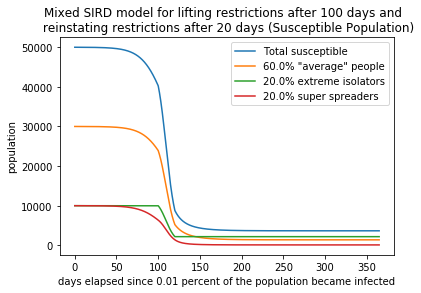

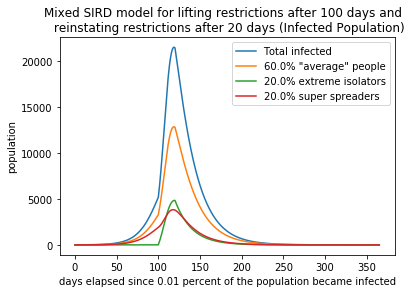

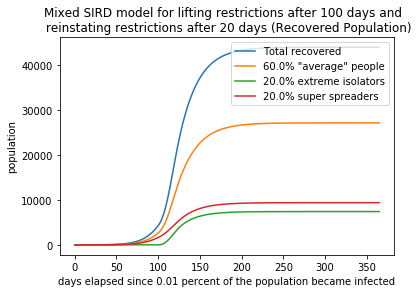

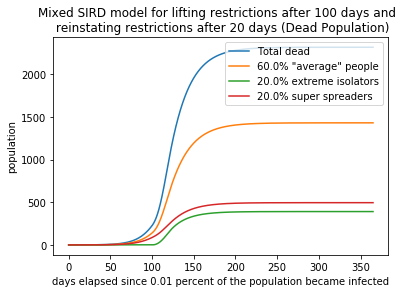

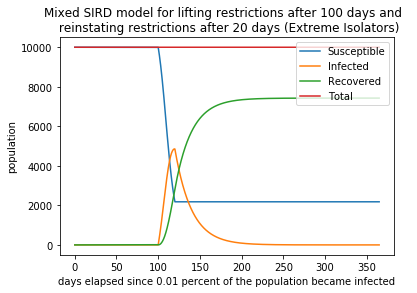

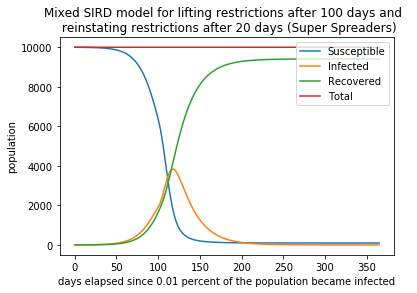

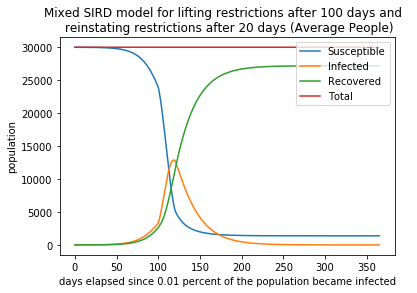

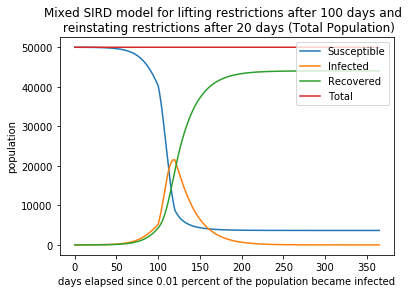

In [19]:
for n in range(8):
    if n == 0:
        plt.plot(t, S)   
        plt.plot(t, S3)
        plt.plot(t, S1)
        plt.plot(t, S2)
        plt.legend(['Total susceptible', str(round(((1-pss-psd)*100),3)) + '% "average" people',
                    str(round((psd*100),3)) + '% extreme isolators',
                    str(round((pss*100),3)) + '% super spreaders'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(int(days_under_first_quarantine))
                + ' days and  \n reinstating restrictions after '
                + str(int(day_second_quarantine_starts-days_under_first_quarantine))
                + ' days (Susceptible Population)')    
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()
    elif n == 1:
        plt.plot(t, I)
        plt.plot(t, I3)
        plt.plot(t, I1)
        plt.plot(t, I2)
        plt.legend(['Total infected', str(round(((1-pss-psd)*100),3)) + '% "average" people',
                    str(round((psd*100),3)) + '% extreme isolators',
                    str(round((pss*100),3)) + '% super spreaders'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(int(days_under_first_quarantine))
                + ' days and  \n reinstating restrictions after '
                + str(int(day_second_quarantine_starts-days_under_first_quarantine))
                + ' days (Infected Population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()    
    elif n == 2:
        plt.plot(t, R)
        plt.plot(t, R3)
        plt.plot(t, R1)
        plt.plot(t, R2)
        plt.legend(['Total recovered', str(round(((1-pss-psd)*100),3)) + '% "average" people',
                    str(round((psd*100),3)) + '% extreme isolators',
                    str(round((pss*100),3)) + '% super spreaders'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(int(days_under_first_quarantine))
                + ' days and  \n reinstating restrictions after '
                + str(int(day_second_quarantine_starts-days_under_first_quarantine))
                + ' days (Recovered Population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()
    elif n == 3:
        plt.plot(t, D)
        plt.plot(t, D3)
        plt.plot(t, D1)
        plt.plot(t, D2)
        plt.legend(['Total dead', str(round(((1-pss-psd)*100),3)) + '% "average" people',
                    str(round((psd*100),3)) + '% extreme isolators',
                    str(round((pss*100),3)) + '% super spreaders'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(int(days_under_first_quarantine))
                + ' days and  \n reinstating restrictions after '
                + str(int(day_second_quarantine_starts-days_under_first_quarantine))
                + ' days (Dead Population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()
    elif n == 4:
        plt.plot(t, S1)
        plt.plot(t, I1)
        plt.plot(t, R1)
        plt.plot(t, T1)
        plt.legend(['Susceptible', 'Infected', 'Recovered', 'Total'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(int(days_under_first_quarantine))
                + ' days and  \n reinstating restrictions after '
                + str(int(day_second_quarantine_starts-days_under_first_quarantine))
                + ' days (Extreme Isolators)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()    
    elif n == 5:
        plt.plot(t, S2)
        plt.plot(t, I2)
        plt.plot(t, R2)
        plt.plot(t, T2)
        plt.legend(['Susceptible', 'Infected', 'Recovered', 'Total'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(int(days_under_first_quarantine))
                + ' days and  \n reinstating restrictions after '
                + str(int(day_second_quarantine_starts-days_under_first_quarantine))
                + ' days (Super Spreaders)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()
    elif n == 6:
        plt.plot(t, S3)
        plt.plot(t, I3)
        plt.plot(t, R3)
        plt.plot(t, T3)
        plt.legend(['Susceptible', 'Infected', 'Recovered', 'Total'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(int(days_under_first_quarantine))
                + ' days and  \n reinstating restrictions after '
                + str(int(day_second_quarantine_starts-days_under_first_quarantine))
                + ' days (Average People)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()    
    else:
        plt.plot(t, S)
        plt.plot(t, I)
        plt.plot(t, R)
        plt.plot(t, N)
        plt.legend(['Susceptible', 'Infected', 'Recovered', 'Total'], loc='upper right')
        plt.title('Mixed SIRD model for lifting restrictions after ' + str(int(days_under_first_quarantine))
                + ' days and  \n reinstating restrictions after '
                + str(int(day_second_quarantine_starts-days_under_first_quarantine))
                + ' days (Total Population)')
        plt.xlabel('days elapsed since 0.01 percent of the population became infected')
        plt.ylabel('population')
        plt.show()  

# Tool for counting total infections

Create an array I_T = np.zeros(niter), I_T\[0\]=I\[0\]. In the for loop for Euler's Method, add I_T\[j+1\]=I_T\[j\]+I\[j\]\*dt at the end. Then adjust by a factor of (1-alpha)\*gamma+alpha\*rho in this case to account for over-counting.

# Sources:

https://www.davidketcheson.info/2020/03/19/SIR_Estimating_parameters.html

https://www.davidketcheson.info/2020/03/19/SIR_predictions.html

https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4

https://idmod.org/docs/malaria/model-sir.html